# Enrichment in DE genes

In [1]:
import functools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import multipletests

## Functions

### Cached functions

In [2]:
@functools.lru_cache()
def get_wgcna_modules():
    return pd.read_csv("../../_m/modules.csv", index_col=0)


@functools.lru_cache()
def get_degs():
    return set(pd.read_csv('../../../../differential_analysis/'+\
                           'hippocampus/_m/genes/diffExpr_EAvsAA_FDR05.txt',
                           sep='\t', usecols=[0], index_col=0).index)


@functools.lru_cache()
def get_mhc_genes():
    return set(pd.read_csv('../../../../input/counts/mhc_region_genes/'+\
                           '_m/mhc_genes.csv')['gene_id'])

### Simple functions

In [3]:
def fet(a, b, u):
    # a, b, u are sets
    # u is the universe
    yes_a = u.intersection(a)
    yes_b = u.intersection(b)
    no_a = u - a
    no_b = u - b
    m = [[len(yes_a.intersection(yes_b)), len(no_a.intersection(yes_b)) ], 
         [len(yes_a.intersection(no_b)), len(no_a.intersection(no_b))]]
    return fisher_exact(m)


def enrichment_rows():
    mod = get_wgcna_modules().module.unique()
    u = set(get_wgcna_modules().index) 
    for ii in range(len(mod)): # for each module
        a = set(get_wgcna_modules()[(get_wgcna_modules().module) == mod[ii]].index)
        b = set(get_wgcna_modules()[(get_wgcna_modules().module) == mod[ii]].index) - get_mhc_genes()
        yield (mod[ii],
               len(a),
               *fet(a, get_degs(), u),
               *fet(b, get_degs() - get_mhc_genes(), u),
               )


## Main

### Enrichment

In [4]:
edf = pd.DataFrame.from_records(enrichment_rows(), 
                                 columns=['Module_ID', 'N_Genes', 'DEG_OR', 'DEG_P', 
                                          'DEG_noMHC_OR', 'DEG_noMHC_P'],
                                 index='Module_ID')
edf['DEG_FDR'] = multipletests(edf['DEG_P'], method='fdr_bh')[1]
edf['DEG_noMHC_FDR'] = multipletests(edf['DEG_noMHC_P'], method='fdr_bh')[1]
edf = edf.loc[:, ['N_Genes', 'DEG_OR', 'DEG_P', 'DEG_FDR', 'DEG_noMHC_OR', 'DEG_noMHC_P', 'DEG_noMHC_FDR']]

In [5]:
print(edf[(edf["DEG_FDR"] < 0.05)].shape)
edf[(edf["DEG_FDR"] < 0.05)]

(21, 7)


,N_Genes,DEG_OR,DEG_P,DEG_FDR,DEG_noMHC_OR,DEG_noMHC_P,DEG_noMHC_FDR
Module_ID,,,,,,,
pink,152,0.361243,1.720378e-03,5.943126e-03,0.365096,2.365272e-03,8.170938e-03
black,159,0.344371,9.338313e-04,3.548559e-03,0.350382,1.284003e-03,4.879210e-03
turquoise,520,1.656469,1.448295e-05,1.100704e-04,1.678814,9.484253e-06,7.208032e-05
blue,507,1.976651,2.536696e-09,3.213148e-08,1.962619,4.689697e-09,5.940282e-08
green,262,0.421813,2.289994e-04,1.243140e-03,0.426325,3.047298e-04,1.654248e-03
yellow,369,0.197764,1.124653e-11,2.136841e-10,0.199879,1.646520e-11,3.128389e-10
purple,90,0.000000,5.444276e-06,5.172062e-05,0.000000,8.528726e-06,7.208032e-05
greenyellow,72,0.091714,7.257052e-04,3.064089e-03,0.092689,7.286374e-04,3.076469e-03
midnightblue,55,0.120693,8.069371e-03,1.916476e-02,0.121977,7.961480e-03,2.016908e-02


In [6]:
print(edf[(edf["DEG_noMHC_FDR"] < 0.05)].shape)
set(edf[(edf["DEG_FDR"] < 0.05)].index) - set(edf[(edf["DEG_noMHC_FDR"] < 0.05)].index)

(21, 7)


set()

#### sienna3 is enriched in MHC differentially expressed genes

In [7]:
edf.to_csv('wgcna_module_enrichment.csv')

### Plot heatmap

<AxesSubplot:title={'center':'Enrichment/depletion DE genes in WGCNA modules\n(FDR values)'}>

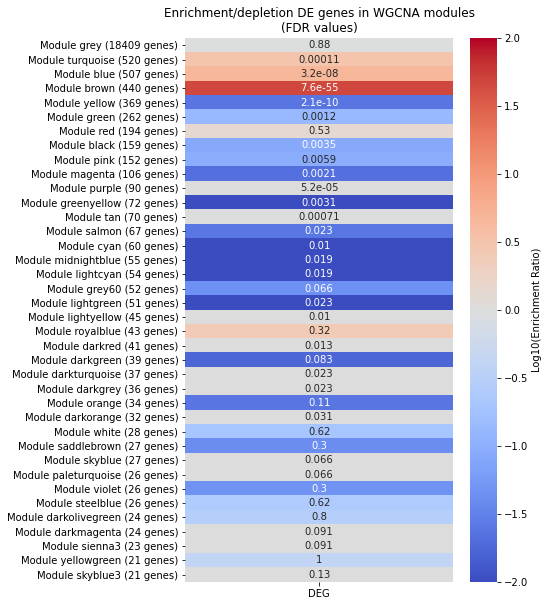

In [8]:
df = edf.sort_values("N_Genes", ascending=False)
df2 = np.log(df.loc[:, ['DEG_OR']]).replace([np.inf, -np.inf], 0)
df2.columns = ['DEG']
df2.index = ["Module %s (%d genes)" % (x,y) for x,y in zip(df2.index, df['N_Genes'])]
df3 = df.loc[:, ['DEG_FDR']]

fig, ax = plt.subplots(figsize=(6,10))
p = sns.heatmap(df2, cmap='coolwarm', annot=df3, yticklabels=df2.index, center=0,
                cbar_kws={'label': 'Log10(Enrichment Ratio)'}, vmin=-2, vmax=2)
p.set_title("Enrichment/depletion DE genes in WGCNA modules\n(FDR values)")
p.get_figure().savefig('wgcna_module_enrichment.pdf', bbox_inches='tight')
p

<AxesSubplot:title={'center':'Enrichment/depletion DE genes in WGCNA modules\n(FDR values)'}>

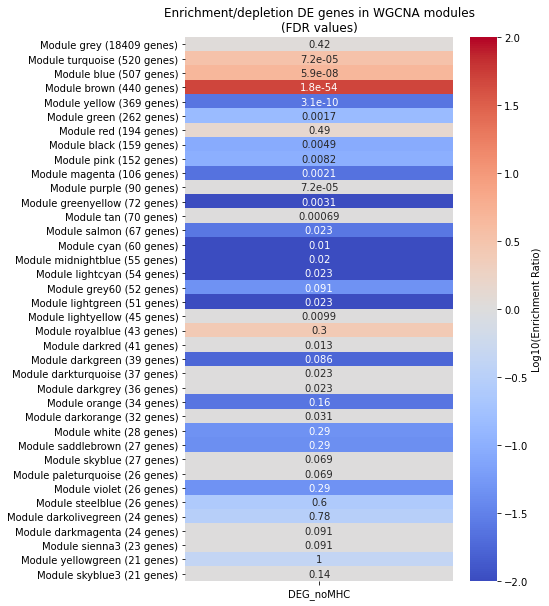

In [9]:
df = edf.sort_values("N_Genes", ascending=False)
df2 = np.log(df.loc[:, ['DEG_noMHC_OR']]).replace([np.inf, -np.inf], 0)
df2.columns = ['DEG_noMHC']
df2.index = ["Module %s (%d genes)" % (x,y) for x,y in zip(df2.index, df['N_Genes'])]
df3 = df.loc[:, ['DEG_noMHC_FDR']]

fig, ax = plt.subplots(figsize=(6,10))
p = sns.heatmap(df2, cmap='coolwarm', annot=df3, yticklabels=df2.index, center=0,
                cbar_kws={'label': 'Log10(Enrichment Ratio)'}, vmin=-2, vmax=2)
p.set_title("Enrichment/depletion DE genes in WGCNA modules\n(FDR values)")
p.get_figure().savefig('wgcna_module_enrichment_noMHC.pdf', bbox_inches='tight')
p